# AI Jukebox

### Generate Midi File
Plug in trained weights and notes file to generate midi.  

In [1]:
import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import sys
from datetime import datetime
import re
import pickle
from music21 import instrument

import processing as pr
import neural_network as nn
import generate as cr
import utils as ut

/Users/brianmcmahon/anaconda3/envs/MusicGenerator1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
sys.executable

'/Users/brianmcmahon/anaconda3/envs/MusicGenerator1/bin/python'

In [3]:
weight_file = 'output/201803312153-MidiWorld-200-200-weight-45-2.0778-6.0354.hdf5'
note_file = 'output/201803312153-MidiWorld-200-200-input_notes'

timestamp = re.sub(r'[-: ]','',str(datetime.now()).split('.')[0])[:-2]
# output_name = midi_files.split('/')[-3]
# epochs = 200
# batch_size = 128
sequence_length = 200 # the LSTM RNN will consider this many notes
output_tag = 'output/{}-{}-'.format(timestamp, sequence_length)
notes_generated = 500
temperature = 1.0
offset_adj = 0.5
sound = instrument.Flute()

In [4]:
# convert fully trained weights to midi file
def weights_to_midi(note_file, sequence_length, weight_file, temperature, offset_adj, sound):
    with open(note_file, 'rb') as filepath:
        notes = pickle.load(filepath)
    network_input, network_output, n_patterns, n_vocab, pitchnames = pr.prepare_sequences(notes, sequence_length)
    normalized_input = pr.reshape_for_creation(network_input, n_patterns, sequence_length, n_vocab)
    model = nn.create_network(normalized_input, n_vocab, weight_file)
    prediction_output= cr.generate_notes(model, network_input, pitchnames,notes_generated, n_vocab, temperature)
    output_notes, midi_file = cr.create_midi(prediction_output, output_tag, sequence_length, offset_adj, sound)
    return output_notes, midi_file, model

In [5]:
# terminal_output = output_tag + 'terminal.log'
# sys.stdout = ut.Logger(terminal_output)
# print("Terminal output being saved at {}".format(terminal_output))
output_notes, midi_file, model = weights_to_midi(note_file, sequence_length, weight_file, temperature, offset_adj, sound)
# print("Run Complete. Terminal log saved at {}".format(terminal_output))


**Preparing sequences for training**
Pitchnames (unique notes/chords from 'notes') at length 663: ['0', '0.1', '0.1.2.3.4.6.8.10', '0.1.2.4.6', '0.1.3', '0.1.3.7', '0.1.4', '0.1.4.6', '0.1.5', '0.1.6', '0.2', '0.2.3', '0.2.3.4.6.7', '0.2.3.4.7.8', '0.2.3.5.6.7', '0.2.3.6', '0.2.3.6.7', '0.2.3.7', '0.2.4', '0.2.4.5', '0.2.4.6', '0.2.4.7', '0.2.4.7.9', '0.2.5', '0.2.5.6', '0.2.5.6.7', '0.2.5.7', '0.2.5.7.8', '0.2.5.8', '0.2.6', '0.2.6.7', '0.2.7', '0.3', '0.3.4', '0.3.4.5.6.7', '0.3.4.6.7', '0.3.5', '0.3.5.6.7', '0.3.5.7', '0.3.5.8', '0.3.6', '0.3.6.7', '0.3.6.7.8', '0.3.6.8', '0.3.6.9', '0.3.7', '0.4', '0.4.5', '0.4.5.7', '0.4.6.7', '0.4.7', '0.4.8', '0.5', '0.5.6', '0.6', '1', '1.2', '1.2.4.5', '1.2.4.7.10', '1.2.6', '1.2.6.9', '1.3', '1.3.4', '1.3.4.6', '1.3.4.8', '1.3.5.8', '1.3.6', '1.3.8', '1.4', '1.4.6', '1.4.7', '1.4.7.10', '1.4.7.9', '1.4.8', '1.5', '1.5.7', '1.5.7.8', '1.5.8', '1.6', '1.6.7', '1.7', '10', '10.0', '10.0.1', '10.0.1.2.3.6', '10.0.1.3.6', '10.0.2', '10.0.2.3.4.6.

Network Input of length 309767 is reshaped to normalized input of (309767, 200, 1)

**LSTM model initializing**
Input nodes: 512 Dropout: 0.3
Input shape (timesteps, data_dim): (200,1)
LSTM modelinitialized for midi CREATION with model from output/201803312153-MidiWorld-200-200-weight-45-2.0778-6.0354.hdf5

**Generating notes**
Integer to note conversion at length: 663
Pattern ends with length 200 and type <class 'list'>
Generated Note Length: 500
First 100: ['C#2', 'F#2', 'F#2', 'F#3', 'E3', 'C#4', '5.7', 'F#3', 'B1', 'C2', 'G#4', 'B1', 'F4', 'C2', 'A4', 'G2', '2.5', 'C2', 'C2', 'F#2', '6.10', 'F4', 'G3', 'C3', 'C2', 'F#3', 'C2', 'D2', 'D2', 'B-1', 'G3', '10', '0.3.7', 'E-5', 'B-4', 'F#2', '6.11.0', 'C2', '0.3.7', 'C2', 'G3', 'C4', '1', 'G4', 'G1', 'F#2', 'F#3', 'C#3', 'B-2', 'F#2', 'F#2', 'F#3', 'D5', 'C2', 'F#1', 'G3', 'G3', 'F#3', 'B-4', '6.9.1', 'F#2', 'F#2', 'F#2', 'E1', 'F#2', '0.3.7', 'F#2', 'F#2', 'D4', 'F#4', 'E1', 'C2', 'C2', 'G3', 'F#2', 'E-4', 'F#3', 'C2', 'F#2', 'F#2', '1

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 1024)              2105344   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 663)               340119    
_________________________________________________________________
activation_1 (Activation)    (None, 663)               0         
Total params: 2,970,263
Trainable params: 2,970,263
Non-trainable params: 0
_________________________________________________________________


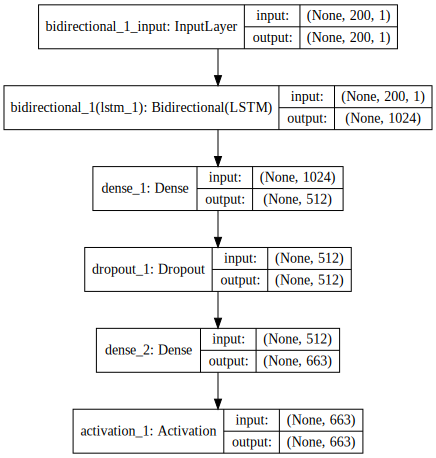

In [7]:
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### Analyze created MIDI

In [8]:
import pretty_midi
import matplotlib.pyplot as plt
import librosa.display
import pandas as pd
import IPython.display as ipd

In [9]:
fs = 16000
rate = 16000
start_pitch = 24
end_pitch = 84

In [10]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=10):
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))
    
def analyze_midi(midi_file):
    instrument_dict = {}
    pm = pretty_midi.PrettyMIDI(midi_file)
    plt.figure(figsize=(12, 4))
    plot_piano_roll(pm, start_pitch, end_pitch)
    print("Time Signature Changes: {} Instruments: {}".format(len(pm.time_signature_changes), len(pm.instruments)))
    for instrument_num in range(len(pm.instruments)):
        instrument_dict[instrument_num] = {'Notes': len(pm.instruments[instrument_num].notes), 
                                           'Pitch_Bends':len(pm.instruments[instrument_num].pitch_bends),
                                           'Control_Changes':len(pm.instruments[instrument_num].control_changes)}
    instrument_dict = pd.DataFrame(instrument_dict)
    return instrument_dict, pm

Time Signature Changes: 0 Instruments: 1


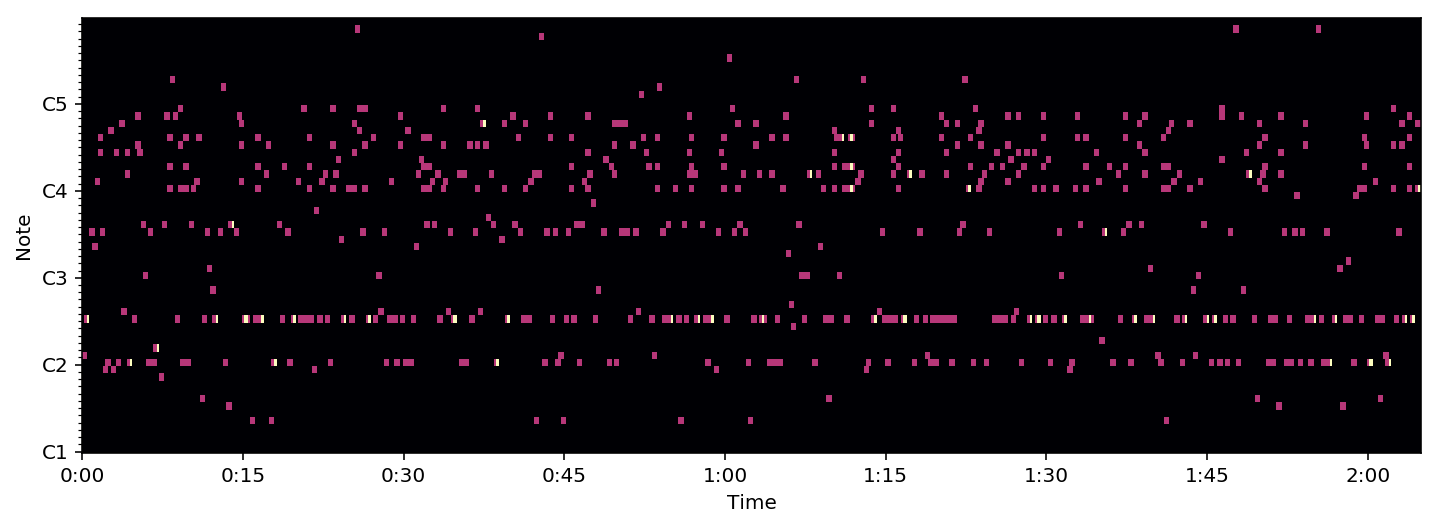

In [11]:
# midi_file = 'output/201803281154-100-lstm_midi.mid'
instrument_dict,pm = analyze_midi(midi_file)
ipd.Audio(pm.synthesize(fs=fs), rate=rate)

### Music21

In [12]:
from music21 import *

ms_path = '/Users/brianmcmahon/Documents/MuseScore2'
lp_path = '/Users/brianmcmahon/Documents/lilypond'

env = environment.Environment()
env['musicxmlPath'] = ms_path
env['lilypondPath'] = lp_path
env['musescoreDirectPNGPath'] = ms_path
env['pdfPath'] = lp_path
env['graphicsPath'] = lp_path

print(env['musicxmlPath'])
print(env['lilypondPath'])

/Users/brianmcmahon/Documents/MuseScore2
/Users/brianmcmahon/Documents/lilypond


In [13]:
# output_notes

In [14]:
note_stream = stream.Stream()
for note in output_notes:
    note_stream.append(note)
note_stream.show()

SubConverterFileIOException: png file of xml not found. Or file >999 pages?